<a href="https://colab.research.google.com/github/keinerfan/CIAP1/blob/CODES/PLsregrsssion_iap1_morganfp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib.pyplot import plot, xlabel, ylabel, show
import matplotlib.pyplot as plt  # Importing plt for show() function
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/keinerfan/CIAP1/DATA-SETS/IAP1_06_morgan_fp.csv")
data.fillna(data.mean(), inplace=True)

y = data.pIC50.values.reshape((-1,1))
data = data.drop(['pIC50'] , axis = 1 )

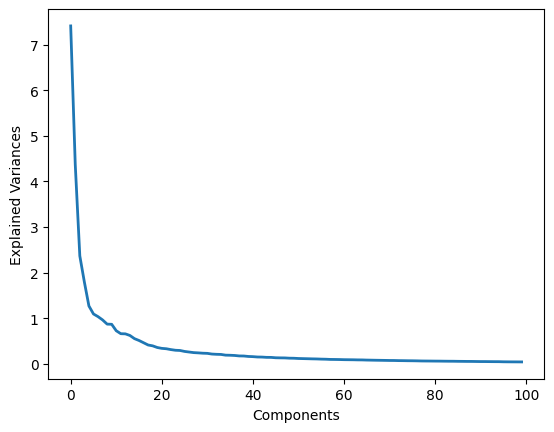

In [2]:

pca = PCA(n_components=100).fit(data)
plot(pca.explained_variance_, linewidth=2)
xlabel('Components')
ylabel('Explained Variances')  # Corrected spelling
plt.show()  # Corrected function call


In [3]:
pca = PCA(n_components= 75)
pca.fit(data)
merged_data  = pca.transform(data)

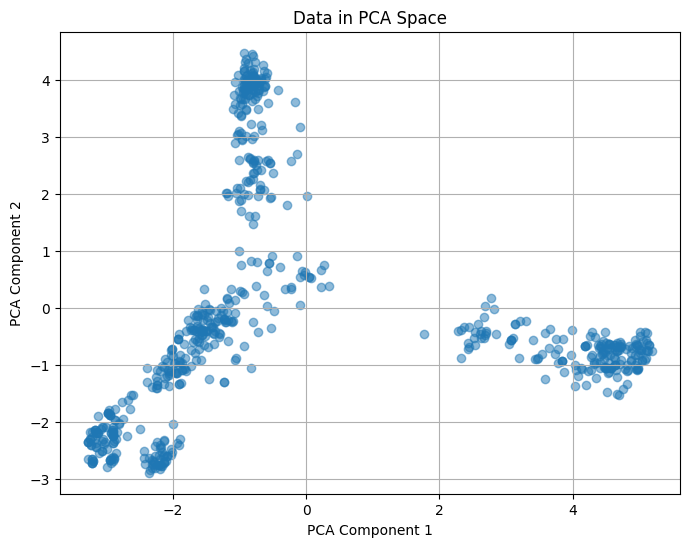

In [4]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(8, 6))
plt.scatter(merged_data[:, 0], merged_data[:, 1], alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data in PCA Space')
plt.grid(True)
plt.show()

# **hyper tunning PLSr**

In [5]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


yc = y

# Define pipeline with SVR
pipeline =PLSRegression(n_components=6)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.2, random_state=0)

# Define hyperparameter grid
param_grid = {
     'n_components': list(range(1, 75)),# Number of PLS components to include
    'scale': [True, False],  # Whether to scale the data
    'max_iter': [500, 1000, 2000],  # Maximum number of iterations
    'tol': [1e-06, 1e-07, 1e-08]  # Tolerance for the optimization
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

Streaming output truncated to the last 5000 lines.
[CV] END max_iter=500, n_components=56, scale=True, tol=1e-08; total time=   0.1s
[CV] END max_iter=500, n_components=56, scale=True, tol=1e-08; total time=   0.0s
[CV] END max_iter=500, n_components=56, scale=True, tol=1e-08; total time=   0.1s
[CV] END max_iter=500, n_components=56, scale=True, tol=1e-08; total time=   0.0s
[CV] END max_iter=500, n_components=56, scale=True, tol=1e-08; total time=   0.0s
[CV] END max_iter=500, n_components=56, scale=False, tol=1e-06; total time=   0.1s
[CV] END max_iter=500, n_components=56, scale=False, tol=1e-06; total time=   0.1s
[CV] END max_iter=500, n_components=56, scale=False, tol=1e-06; total time=   0.0s
[CV] END max_iter=500, n_components=56, scale=False, tol=1e-06; total time=   0.0s
[CV] END max_iter=500, n_components=56, scale=False, tol=1e-06; total time=   0.0s
[CV] END max_iter=500, n_components=56, scale=False, tol=1e-07; total time=   0.2s
[CV] END max_iter=500, n_components=56, s

Best parameters found:  {'max_iter': 500, 'n_components': 8, 'scale': False, 'tol': 1e-06}
SVR Train Set Metrics:
Mean Squared Error: 0.3131995329091418
R2 Score: 0.8223023940321204


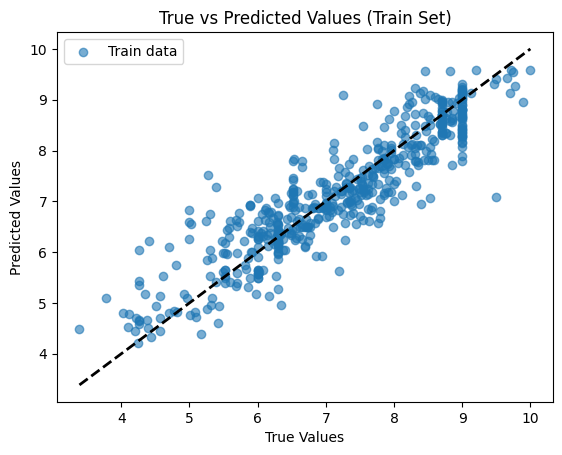


SVR Test Set Metrics:
Mean Squared Error: 0.3337544450355812
R2 Score: 0.7833570380350943


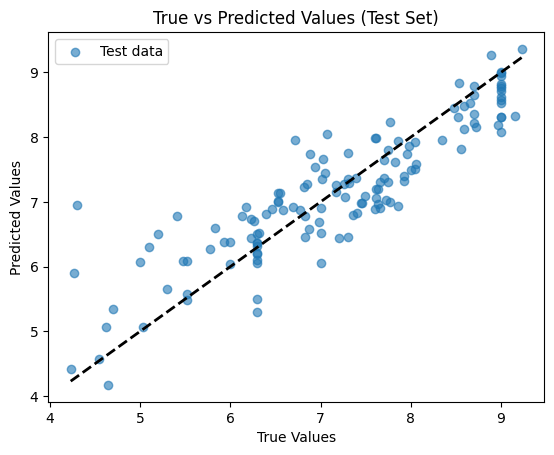

In [6]:

# Train the best model on the training set
best_model.fit(X_train, y_train)

# Predictions and metrics for training set
predicted_labels_train = best_model.predict(X_train)
mse_train = mean_squared_error(y_train, predicted_labels_train)
r2_train = r2_score(y_train, predicted_labels_train)
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)
print("SVR Train Set Metrics:")
print("Mean Squared Error:", mse_train)
print("R2 Score:", r2_train)

# Plot true vs. predicted values for training set
plt.figure()
plt.scatter(y_train, predicted_labels_train, label='Train data', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Train Set)')
plt.legend()
plt.show()

# Predictions and metrics for test set
predicted_labels_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, predicted_labels_test)
r2_test = r2_score(y_test, predicted_labels_test)

print("\nSVR Test Set Metrics:")
print("Mean Squared Error:", mse_test)
print("R2 Score:", r2_test)

# Plot true vs. predicted values for test set
plt.figure()
plt.scatter(y_test, predicted_labels_test, label='Test data', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Test Set)')
plt.legend()
plt.show()

# **internal KFOLD cross validation with 5 folds**

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Define the SVR model
model =PLSRegression(n_components=8 , scale= False , max_iter=500 , tol= 1e-06)

# Number of splits for KFold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)

# Initialize lists to store evaluation metrics for each fold
metrics = {
    'Fold': [],
    'Train R2': [],
    'Train MSE': [],
    'Train MAE': [],
    'Train MAPE': [],
    'Test R2': [],
    'Test MSE': [],
    'Test MAE': [],
    'Test MAPE': []
}

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data), 1):
    X_train, X_test = merged_data[train_index], merged_data[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics for this fold
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    # Append metrics for this fold to the metrics dictionary
    metrics['Fold'].append(fold)
    metrics['Train R2'].append(train_r2)
    metrics['Train MSE'].append(train_mse)
    metrics['Train MAE'].append(train_mae)
    metrics['Train MAPE'].append(train_mape)
    metrics['Test R2'].append(test_r2)
    metrics['Test MSE'].append(test_mse)
    metrics['Test MAE'].append(test_mae)
    metrics['Test MAPE'].append(test_mape)

    # Print metrics for training set
    print(f"======== Fold {fold} ======")
    print("Training Set Metrics:")
    print(f'R-Squared: {train_r2}')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

    # Print metrics for testing set
    print("\nTesting Set Metrics:")
    print(f'R-Squared: {test_r2}')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')

# Calculate averages for each metric
average_metrics = {
    'Fold': ['Average'],
    'Train R2': [np.mean(metrics['Train R2'])],
    'Train MSE': [np.mean(metrics['Train MSE'])],
    'Train MAE': [np.mean(metrics['Train MAE'])],
    'Train MAPE': [np.mean(metrics['Train MAPE'])],
    'Test R2': [np.mean(metrics['Test R2'])],
    'Test MSE': [np.mean(metrics['Test MSE'])],
    'Test MAE': [np.mean(metrics['Test MAE'])],
    'Test MAPE': [np.mean(metrics['Test MAPE'])]
}

# Append average metrics to the metrics dictionary
for key in metrics.keys():
    metrics[key].append(average_metrics[key][0])

# Convert metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Export the DataFrame to a CSV file
metrics_df.to_csv('plsr_k_fold_metrics.csv', index=False)

print("\nMetrics and averages have been saved to 'k_fold_metrics.csv'")
metrics_df

======== Fold 1 ======
Training Set Metrics:
R-Squared: 0.8223023940321204
Mean Squared Error (MSE): 0.31319953290914193
Mean Absolute Error (MAE): 0.4155487587133399
Mean Absolute Percentage Error (MAPE): 6.257050372849548

Testing Set Metrics:
R-Squared: 0.7833570380350943
Mean Squared Error (MSE): 0.3337544450355812
Mean Absolute Error (MAE): 0.4426408760215093
Mean Absolute Percentage Error (MAPE): 6.712949930282962
======== Fold 2 ======
Training Set Metrics:
R-Squared: 0.8501219650965006
Mean Squared Error (MSE): 0.25833145289009657
Mean Absolute Error (MAE): 0.3899069095625202
Mean Absolute Percentage Error (MAPE): 5.843357518806476

Testing Set Metrics:
R-Squared: 0.6237519031780938
Mean Squared Error (MSE): 0.6249745032141506
Mean Absolute Error (MAE): 0.5792367809793512
Mean Absolute Percentage Error (MAPE): 9.032118987939256
======== Fold 3 ======
Training Set Metrics:
R-Squared: 0.8324894815089569
Mean Squared Error (MSE): 0.2829916277508442
Mean Absolute Error (MAE): 0.402

,Fold,Train R2,Train MSE,Train MAE,Train MAPE,Test R2,Test MSE,Test MAE,Test MAPE
0,1,0.822302,0.313200,0.415549,6.257050,0.783357,0.333754,0.442641,6.712950
1,2,0.850122,0.258331,0.389907,5.843358,0.623752,0.624975,0.579237,9.032119
2,3,0.832489,0.282992,0.402144,6.060951,0.749830,0.456549,0.485302,7.170472
3,4,0.820075,0.313360,0.423459,6.407756,0.798767,0.318914,0.416461,6.113810
4,5,0.817590,0.304421,0.414780,6.223239,0.801857,0.378770,0.486843,7.457236
5,Average,0.828516,0.294461,0.409168,6.158471,0.751513,0.422592,0.482097,7.297318


# **Saving the model **